In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#import the data
df = pd.read_csv(r'tennis_stats.csv')

In [3]:
#exploring the data
display(df.head(10))
#display(df.info())


,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
5,Andres Artunedo Martinavarro,2014,0.77,0.67,0.09,0.55,0.40,3,0.50,6,...,0.10,0.26,9,0.67,0.44,0.64,0,1,10434,495
6,Eduardo Struvay,2014,0.76,0.65,0.31,0.36,0.41,1,0.29,6,...,0.20,0.35,9,0.56,0.45,0.58,0,1,24218,1107
7,Riccardo Bellotti,2017,0.76,0.55,0.35,0.39,0.41,0,0.50,9,...,0.31,0.37,14,0.57,0.45,0.51,0,1,61154,432
8,Austin Krajicek,2017,0.76,0.78,0.16,0.57,0.49,9,0.25,3,...,0.06,0.30,16,0.88,0.50,0.73,0,1,52940,291
9,Guilherme Clezar,2011,0.76,0.56,0.24,0.46,0.13,3,0.00,5,...,0.00,0.21,8,0.63,0.38,0.54,0,1,18829,241


In [4]:
#sorting dataset for ease of analysis:
df = df.rename(columns=str.lower)

#service game columns (offensive)
offensive = ['aces', 'doublefaults', 'firstserve', 'firstservepointswon', 'secondservepointswon', 'breakpointsfaced', 'breakpointssaved', 'servicegamesplayed', 'servicegameswon', 'totalservicepointswon']

#return game columns (defensive)
defensive = ['firstservereturnpointswon', 'secondservereturnpointswon', 'breakpointsopportunities', 'breakpointsconverted', 'returngamesplayed', 'returngameswon', 'returnpointswon', 'totalpointswon']

#outcome
outcome = ['wins', 'losses', 'winnings', 'ranking']

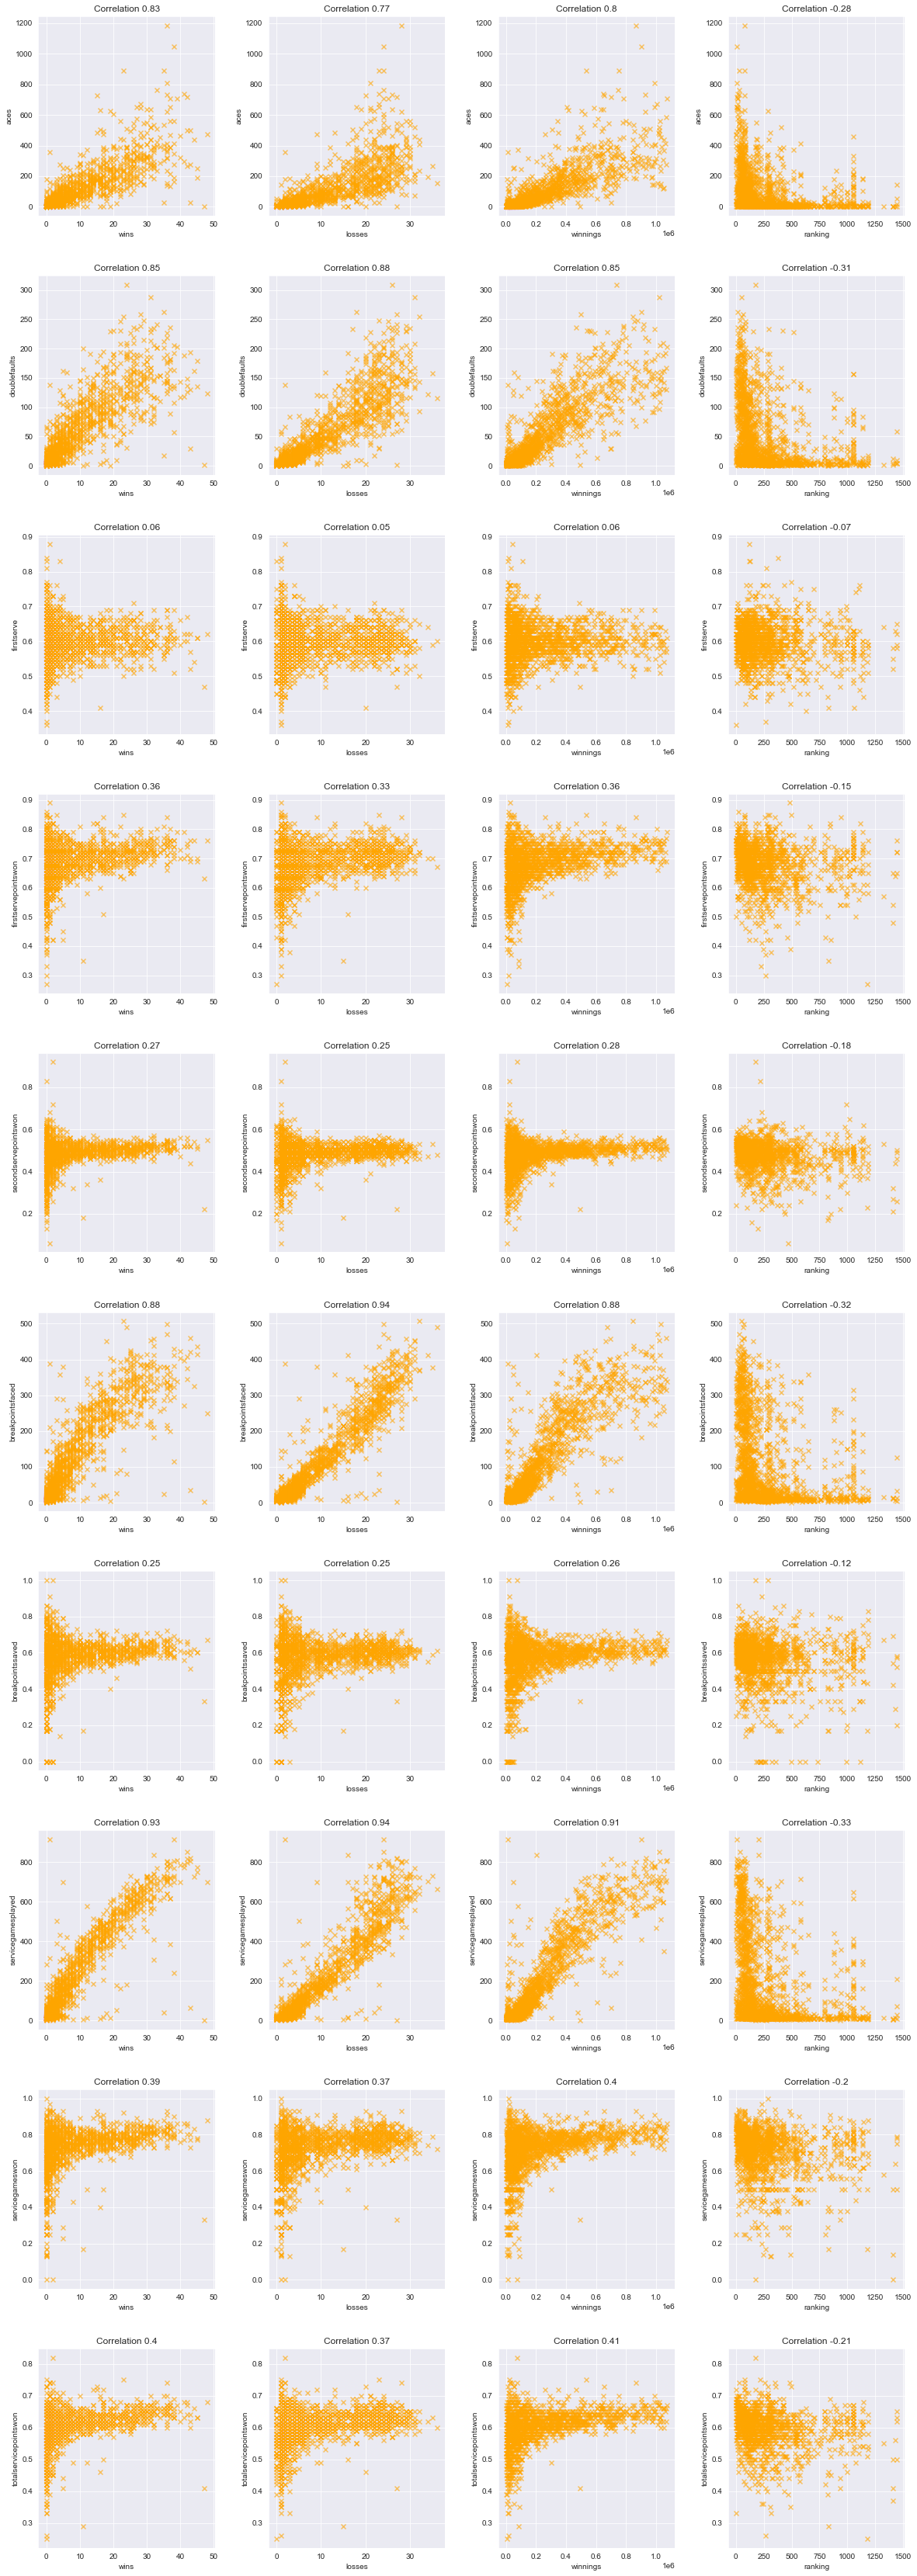

In [5]:
#Exploratory analysis on the data for different features against the different outcomes.
#Are any relationships found between the features and outcomes? Do any of the features seem to predict the outcomes?
# offensive features
plt.figure(figsize=[20, 60])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(offensive)):
    for ii in range(len(outcome)):
        plt.subplot(len(offensive), len(outcome), 1+i*len(outcome)+ii)
        plt.scatter(df[outcome[ii]], df[offensive[i]], marker='x', color='orange', alpha=0.6)
        plt.xlabel(outcome[ii])
        plt.ylabel(offensive[i])
        plt.title(f'Correlation {round((df[offensive[i]].corr(df[outcome[ii]])),2)}')
plt.show()

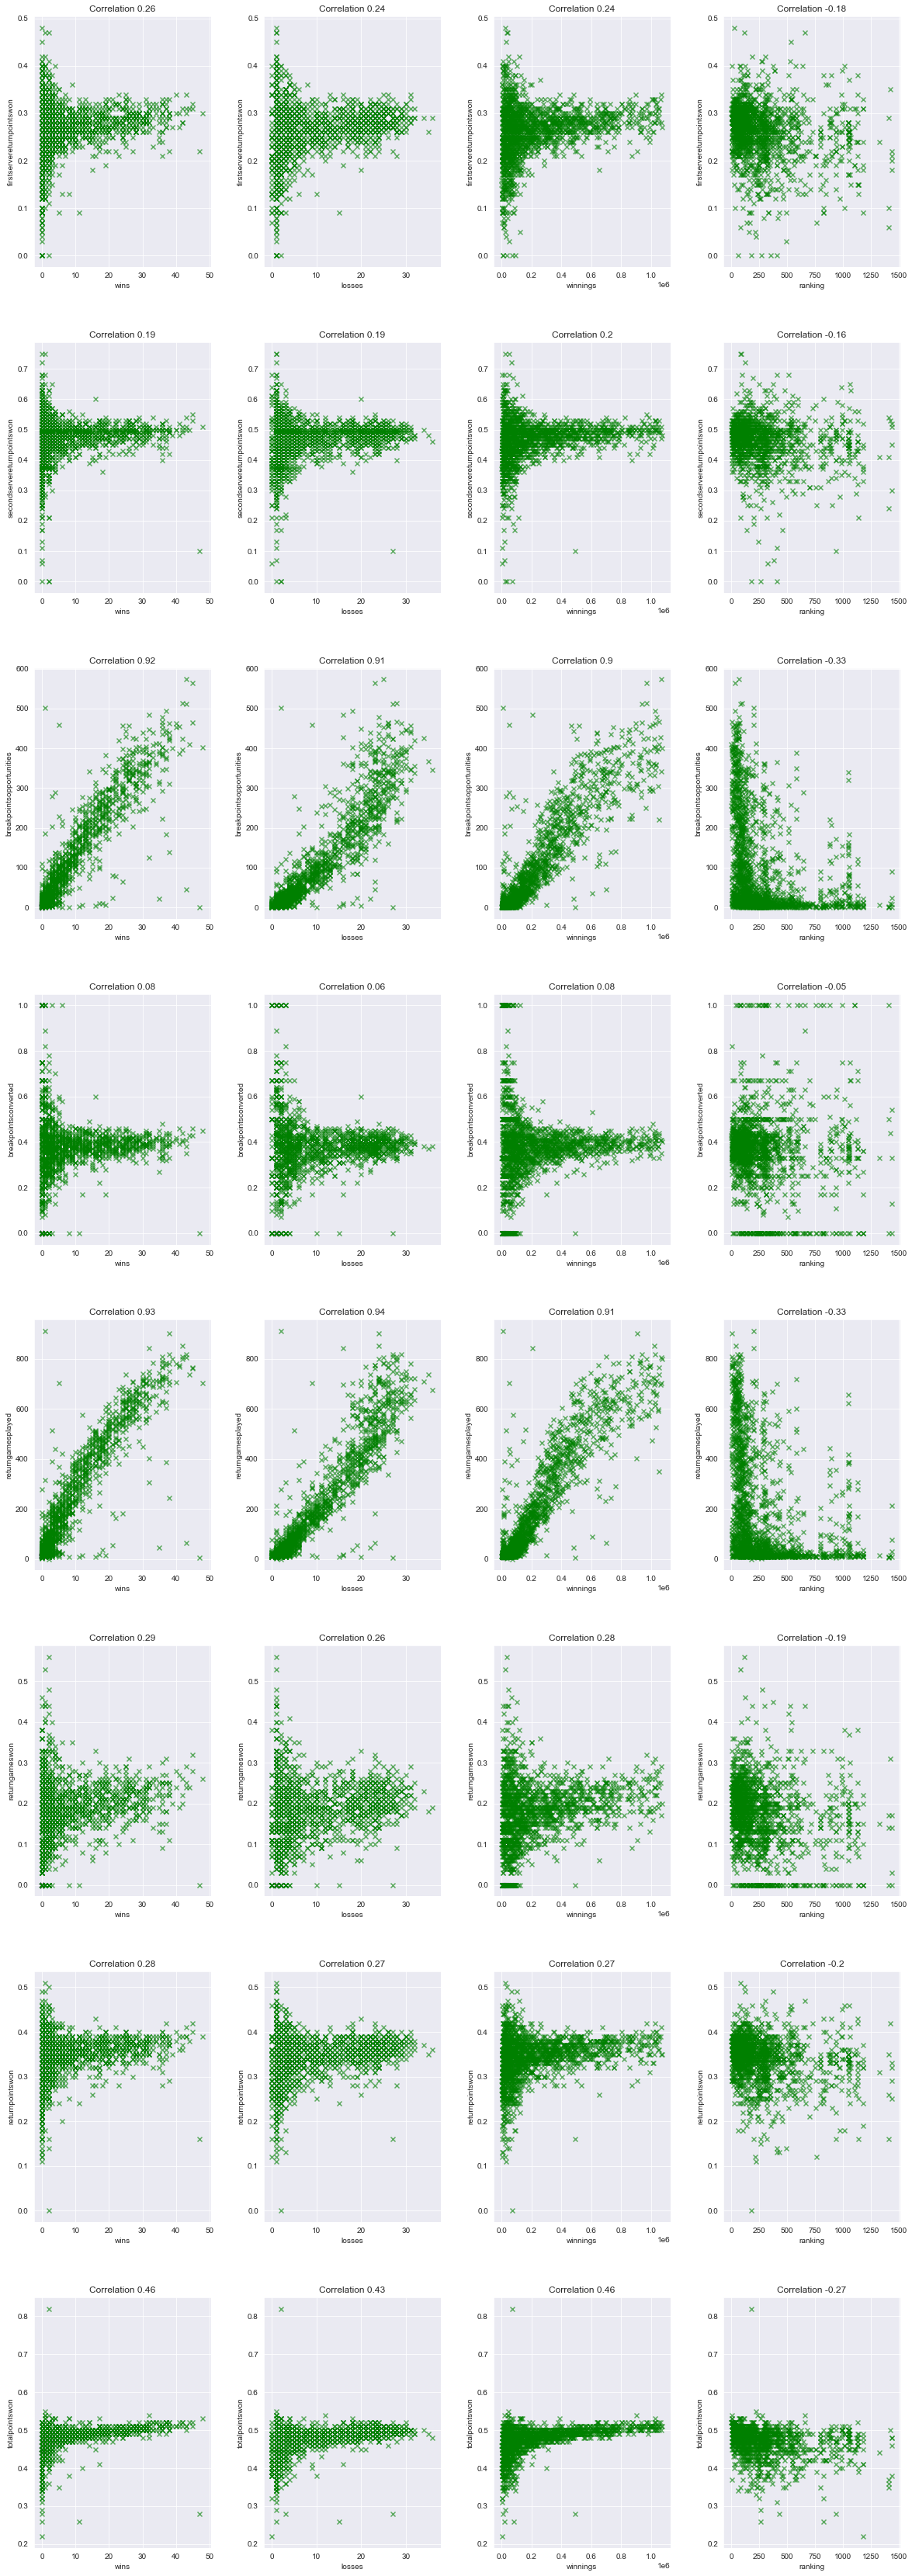

In [6]:
#defensive
plt.figure(figsize=[20, 60])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(defensive)):
    for ii in range(len(outcome)):
        plt.subplot(len(defensive), len(outcome), 1+i*len(outcome)+ii)
        plt.scatter(df[outcome[ii]], df[defensive[i]], marker='x', color='green', alpha=0.6)
        plt.xlabel(outcome[ii])
        plt.ylabel(defensive[i])
        plt.title(f'Correlation {round((df[defensive[i]].corr(df[outcome[ii]])),2)}')
plt.show()

Function for single feature linear regression model

In [7]:
def linear_regress_func(features, outcomes):
    x = df[features]
    y = df[outcomes]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 15)

    regr = LinearRegression()
    regr.fit(x_train, y_train)
    y_predict = regr.predict(x_test)
    plt.scatter(y_test, y_predict, alpha=0.6, color='yellow')
    plt.title(f'Plot of model predictions against model test results for {features} and {outcomes}')
    plt.xlabel('Model results')
    plt.ylabel('Model predictions')
    train_score = regr.score(x_train, y_train)
    test_score = regr.score(x_test, y_test)
    print('Test score: ' + '{:.3f}'.format(test_score))
    print('Training score: ' + '{:.3f}'.format(train_score))
    plt.show()

Test score: 0.895
Training score: 0.888


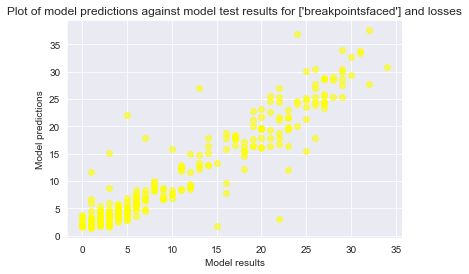

In [8]:
linear_regress_func(['breakpointsfaced'], 'losses')

Test score: 0.834
Training score: 0.805


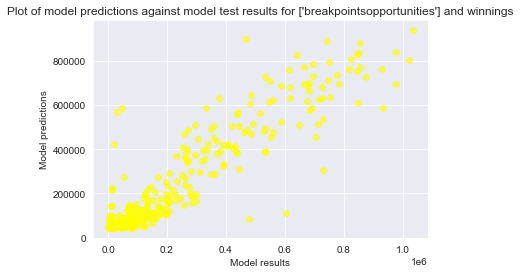

In [9]:
linear_regress_func(['breakpointsopportunities'], 'winnings')

Test score: 0.000
Training score: 0.002


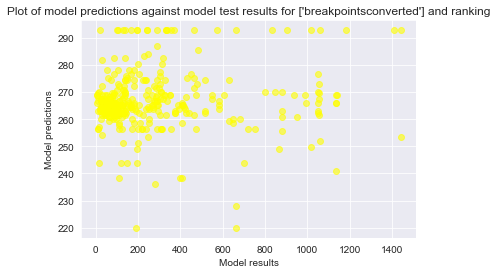

In [10]:
linear_regress_func(['breakpointsconverted'], 'ranking')

Linear regression models using two features to predict yearly earnings

In [11]:
def linear_regress_func2(feature1, feature2):
    features = [feature1, feature2]
    x = df[features]
    y = df['winnings']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 15)

    regr = LinearRegression()
    regr.fit(x_train, y_train)
    y_predict = regr.predict(x_test)
    plt.scatter(y_test, y_predict, alpha=0.6, color='purple')
    plt.title('Plot of model predictions against model test results')
    plt.xlabel('Model results')
    plt.ylabel('Model predictions')
    train_score = regr.score(x_train, y_train)
    test_score = regr.score(x_test, y_test)
    print('Test score: ' + '{:.3f}'.format(test_score))
    print('Training score: ' + '{:.3f}'.format(train_score))
    plt.show()

Test score: 0.774
Training score: 0.766


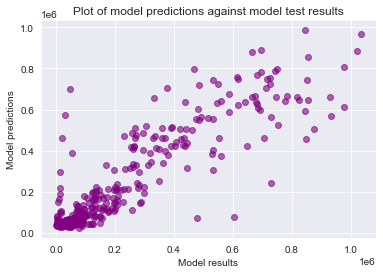

In [12]:
linear_regress_func2('breakpointsconverted', 'breakpointsfaced')

Test score: 0.640
Training score: 0.638


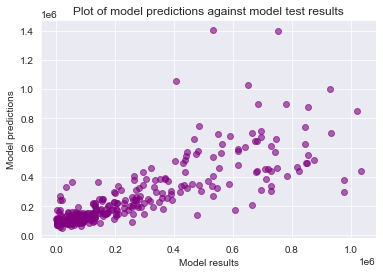

In [13]:
linear_regress_func2('aces', 'breakpointssaved')

Test score: 0.844
Training score: 0.832


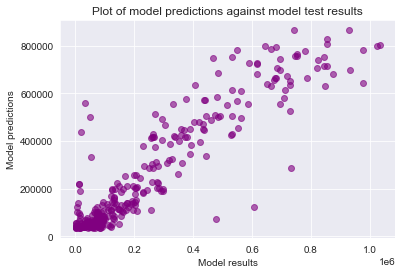

In [14]:
linear_regress_func2('breakpointsopportunities', 'servicegamesplayed')

Test score: 0.834
Training score: 0.807


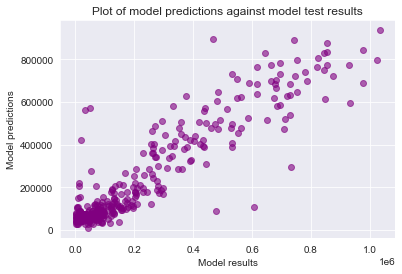

In [15]:
linear_regress_func2('breakpointsopportunities', 'firstservereturnpointswon')

Multiple feature model


In [16]:
def linear_regress_multi_funct(feature_list):
    x = df[feature_list]
    y = df['winnings']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 15)

    regr = LinearRegression()
    regr.fit(x_train, y_train)
    y_predict = regr.predict(x_test)
    plt.scatter(y_test, y_predict, alpha=0.6, color='purple')
    plt.title('Plot of model predictions against model test results')
    plt.xlabel('Model results')
    plt.ylabel('Model predictions')
    train_score = regr.score(x_train, y_train)
    test_score = regr.score(x_test, y_test)
    print('Test score: ' + '{:.3f}'.format(test_score))
    print('Training score: ' + '{:.3f}'.format(train_score))
    print(regr.coef_)
    plt.show()

Test score: 0.844
Training score: 0.837
[   -224.70982241     597.56713192  -12311.67142208  105446.28887541
   82827.95673251    -946.95319839   43851.71204529    1522.68896121
  -31113.35331452 -145130.00497417]


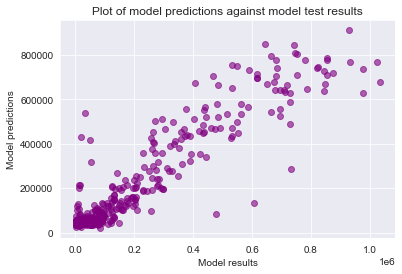

In [17]:
linear_regress_multi_funct(offensive)

Test score: 0.843
Training score: 0.833
[ -50340.39558672   15999.76033163     337.93488466   -9384.40391443
     858.32885242   88020.66695849 -222257.88459843  235218.34384964]


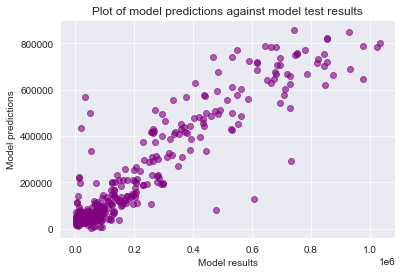

In [18]:
linear_regress_multi_funct(defensive)

Test score: 0.850
Training score: 0.840
[-7.01700826e+01  5.69262461e+02  1.53230513e+04  1.46794013e+05
  1.10426528e+05 -9.25477079e+02  4.92599247e+04  8.78638126e+02
 -1.28579370e+04 -1.04731234e+05 -1.61102625e+04  2.39799159e+04
  6.24525190e+02 -5.16779614e+03  2.12775267e+02  1.09963551e+05
 -5.50191046e+04 -2.56697401e+05]


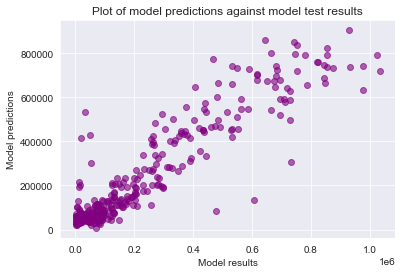

In [19]:
features_all = offensive + defensive
linear_regress_multi_funct(features_all)